In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


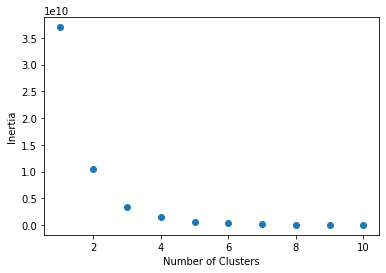

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics

inertia = []
a=[]
X = df[['Deaths']]

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=49,init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    a.append(k)

plt.scatter(a, inertia)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(X)

In [5]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = kmeans.labels_

In [6]:
df['Cluster'] = cluster_map['cluster'].astype(int)

df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Cluster
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,0
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,0
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0


In [7]:
df[df["Cluster"] == 0]['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guya

In [8]:
df[df["Cluster"] == 1]['Country/Region'].values

array(['Brazil', 'US'], dtype=object)

In [9]:
df[df["Cluster"] == 2]['Country/Region'].values

array(['France', 'India', 'Italy', 'Mexico', 'Peru', 'Spain',
       'United Kingdom'], dtype=object)

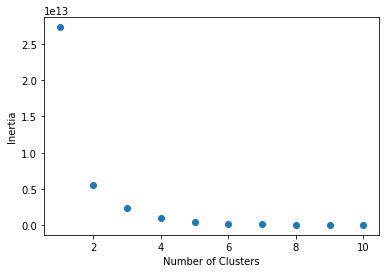

In [10]:
Y = df[['Confirmed']]
inertia = []
a=[]

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=49,init='k-means++')
    kmeans.fit(Y)
    inertia.append(kmeans.inertia_)
    a.append(k)

plt.scatter(a, inertia)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [11]:
kmeans2 = KMeans(n_clusters=3, init='k-means++').fit(Y)

In [12]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster_2'] = kmeans2.labels_

df['Cluster_2'] = cluster_map['cluster_2'].astype(int)
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Cluster,Cluster_2
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0,0
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,0,0
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0,0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,0,0
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0,0


In [13]:
df[df["Cluster_2"] == 0]['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Biss

In [14]:
df[df["Cluster_2"] == 1]['Country/Region'].values

array(['Brazil', 'India'], dtype=object)

In [15]:
df[df["Cluster_2"] == 2]['Country/Region'].values

array(['US'], dtype=object)

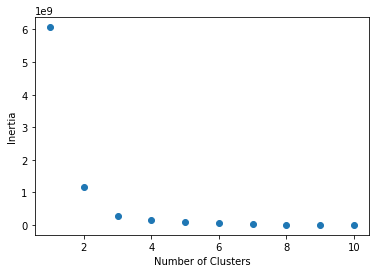

In [16]:
inertia = []
a=[]
features = ['New deaths', 'New cases']

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=49,init='k-means++')
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)
    a.append(k)

plt.scatter(a, inertia)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [17]:
kmeans3 = KMeans(n_clusters=2, init='k-means++').fit(df[features])

In [18]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster_3'] = kmeans3.labels_

df['Cluster_3'] = cluster_map['cluster_3'].astype(int)
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Cluster,Cluster_2,Cluster_3
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0,0,0
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,0,0,0
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0,0,0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,0,0,0
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0,0,0


In [19]:
df[df["Cluster_3"] == 0]['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Biss

In [20]:
df[df["Cluster_3"] == 1]['Country/Region'].values

array(['Brazil', 'India', 'US'], dtype=object)

In [21]:
dft = pd.read_csv("usa_county_wise.csv")
df2 = dft[dft['Province_State'] == 'New York']
df2["Date"]= pd.to_datetime(df2["Date"])
df2

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
1910,84036001,US,USA,840,36001.0,Albany,New York,US,42.600603,-73.977239,"Albany, New York, US",2020-01-22,0,0
1911,84036003,US,USA,840,36003.0,Allegany,New York,US,42.257484,-78.027505,"Allegany, New York, US",2020-01-22,0,0
1912,84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",2020-01-22,0,0
1913,84036007,US,USA,840,36007.0,Broome,New York,US,42.159032,-75.813261,"Broome, New York, US",2020-01-22,0,0
1914,84036009,US,USA,840,36009.0,Cattaraugus,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",2020-01-22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626549,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",2020-07-27,35799,1443
626550,84036121,US,USA,840,36121.0,Wyoming,New York,US,42.701451,-78.221996,"Wyoming, New York, US",2020-07-27,110,5
626551,84036123,US,USA,840,36123.0,Yates,New York,US,42.635055,-77.103699,"Yates, New York, US",2020-07-27,52,7
627836,84080036,US,USA,840,80036.0,Out of NY,New York,US,0.000000,0.000000,"Out of NY, New York, US",2020-07-27,0,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, max_error

features=['Date']

X = df2[features]
y = df2[['Confirmed']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm

clf = svm.SVR(C=1, kernel='linear', degree=8, gamma='scale', coef0=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

C:\Users\awadh\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
print(r2_score(y_test, predictions))

0.9600701567561117
